# Exploratorio Salary Data

In [1]:
# Librerías básicas para análisis de datos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos de la librería sklearn, la función train_test_split
from sklearn.model_selection import train_test_split
# Importamos la función StandardScaler para normalizar las variables (aunque no la usaremos en este ejemplo básico)
from sklearn.preprocessing import StandardScaler
# Importamos la función LinearRegression de la librería sklearn para inicializar el modelo
from sklearn.linear_model import LinearRegression

# Configuración para mejorar la visualización de gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

# Importación de datos

In [2]:
dataset = pd.read_csv('../data/50_Startups.csv')

# Análisis Exploratorio de Datos

En esta sección vamos a explorar el dataset para entender mejor su estructura, las variables que contiene y sus características principales.

## 1. Información básica del dataset

In [3]:
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(dataset.head())

print("\n" + "="*50)

# Información general del dataset
print("\nInformación general del dataset:")
print(dataset.info())

print("\n" + "="*50)

# Dimensiones del dataset
print(f"\nDimensiones del dataset: {dataset.shape}")
print(f"Número de filas: {dataset.shape[0]}")
print(f"Número de columnas: {dataset.shape[1]}")

print("\n" + "="*50)

# Nombres de las columnas
print("\nNombres de las columnas:")
print(dataset.columns.tolist())

Primeras 5 filas del dataset:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


Dimensiones del dataset: (50, 5)
Númer

## 2. Estadísticas descriptivas

In [4]:
# Estadísticas descriptivas del dataset
print("Estadísticas descriptivas:")
print(dataset.describe())

print("\n" + "="*80)

# Análisis más detallado por variable numérica
variables_numericas = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

for var in variables_numericas:
    print(f"\n--- {var.upper()} ---")
    print(f"Media: ${dataset[var].mean():,.2f}")
    print(f"Mediana: ${dataset[var].median():,.2f}")
    print(f"Desviación estándar: ${dataset[var].std():,.2f}")
    print(f"Mínimo: ${dataset[var].min():,.2f}")
    print(f"Máximo: ${dataset[var].max():,.2f}")
    print(f"Rango: ${dataset[var].max() - dataset[var].min():,.2f}")

print("\n" + "="*80)

# Análisis de la variable categórica
print("\n--- ANÁLISIS DE ESTADOS ---")
print("Frecuencia por estado:")
print(dataset['State'].value_counts())
print(f"\nNúmero de estados únicos: {dataset['State'].nunique()}")
print(f"Estados: {dataset['State'].unique().tolist()}")

Estadísticas descriptivas:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


--- R&D SPEND ---
Media: $73,721.62
Mediana: $73,051.08
Desviación estándar: $45,902.26
Mínimo: $0.00
Máximo: $165,349.20
Rango: $165,349.20

--- ADMINISTRATION ---
Media: $121,344.64
Mediana: $122,699.79
Desviación estándar: $28,017.80
Mínimo: $51,283.14
Máximo: $182,645.56
Rango: $131,362.42

--- MARKETING SPEND ---
Media: $211,025.10
Mediana: $2

## 3. Verificación de valores faltantes y duplicados

In [5]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
print(dataset.isnull().sum())

print("\n" + "="*40)

# Porcentaje de valores faltantes
print("\nPorcentaje de valores faltantes:")
porcentaje_faltantes = (dataset.isnull().sum() / len(dataset)) * 100
print(porcentaje_faltantes)

print("\n" + "="*40)

# Verificar duplicados
duplicados = dataset.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")

if duplicados > 0:
    print("\nFilas duplicadas:")
    print(dataset[dataset.duplicated()])
else:
    print("No se encontraron filas duplicadas.")

print("\n" + "="*40)

# Verificar tipos de datos
print("\nTipos de datos:")
print(dataset.dtypes)

print("\n" + "="*40)

# Verificar valores cero (pueden ser problemáticos)
print("\nVerificación de valores cero:")
for col in variables_numericas:
    zeros = (dataset[col] == 0).sum()
    if zeros > 0:
        print(f"{col}: {zeros} valores cero ({zeros/len(dataset)*100:.1f}%)")
    else:
        print(f"{col}: Sin valores cero")

Valores faltantes por columna:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


Porcentaje de valores faltantes:
R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64


Número de filas duplicadas: 0
No se encontraron filas duplicadas.


Tipos de datos:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


Verificación de valores cero:
R&D Spend: 2 valores cero (4.0%)
Administration: Sin valores cero
Marketing Spend: 3 valores cero (6.0%)
Profit: Sin valores cero


## 4. Análisis de correlaciones

Matriz de correlación:
                 R&D Spend  Administration  Marketing Spend  Profit
R&D Spend           1.0000          0.2420           0.7242  0.9729
Administration      0.2420          1.0000          -0.0322  0.2007
Marketing Spend     0.7242         -0.0322           1.0000  0.7478
Profit              0.9729          0.2007           0.7478  1.0000


Correlaciones con Profit (variable objetivo):
R&D Spend: 0.9729 - Correlación muy fuerte positiva
Marketing Spend: 0.7478 - Correlación muy fuerte positiva
Administration: 0.2007 - Correlación débil positiva


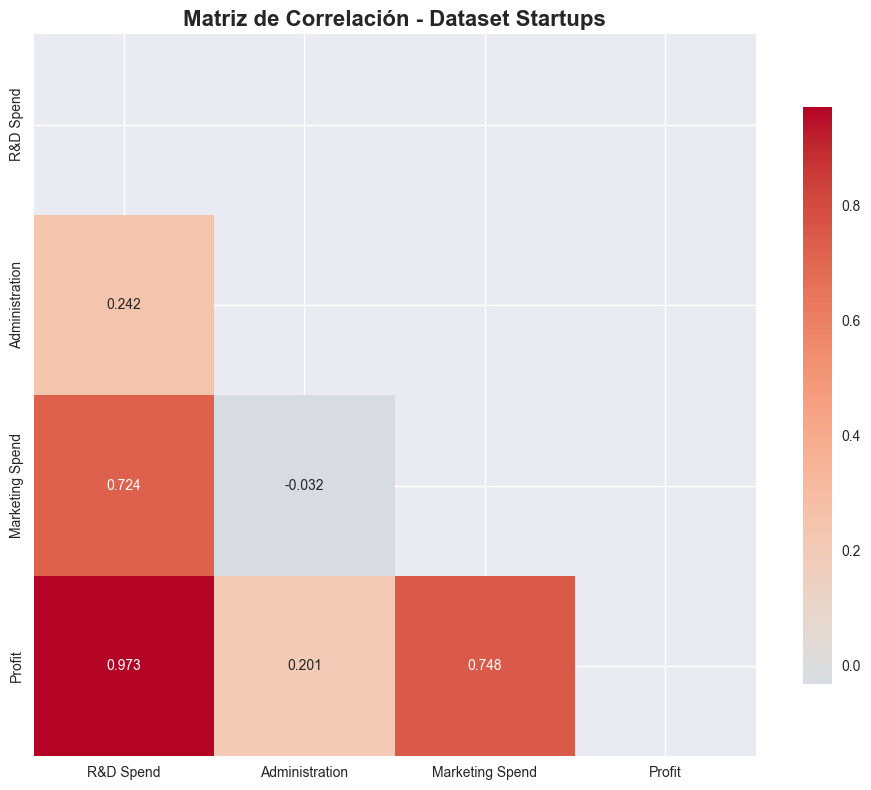

In [6]:
# Calcular matriz de correlación
import seaborn as sns

# Solo variables numéricas
datos_numericos = dataset[variables_numericas]
correlacion = datos_numericos.corr()

print("Matriz de correlación:")
print(correlacion.round(4))

print("\n" + "="*60)

# Correlaciones con la variable objetivo (Profit)
print("\nCorrelaciones con Profit (variable objetivo):")
correlaciones_profit = correlacion['Profit'].sort_values(ascending=False)
for var, corr in correlaciones_profit.items():
    if var != 'Profit':
        if abs(corr) > 0.7:
            fuerza = "muy fuerte"
        elif abs(corr) > 0.5:
            fuerza = "fuerte"
        elif abs(corr) > 0.3:
            fuerza = "moderada"
        elif abs(corr) > 0.1:
            fuerza = "débil"
        else:
            fuerza = "muy débil"
        
        direccion = "positiva" if corr > 0 else "negativa"
        print(f"{var}: {corr:.4f} - Correlación {fuerza} {direccion}")

# Crear heatmap de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Dataset Startups', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Visualizaciones exploratorias

### 5.1 Gráficos de dispersión - Relación de variables con Profit

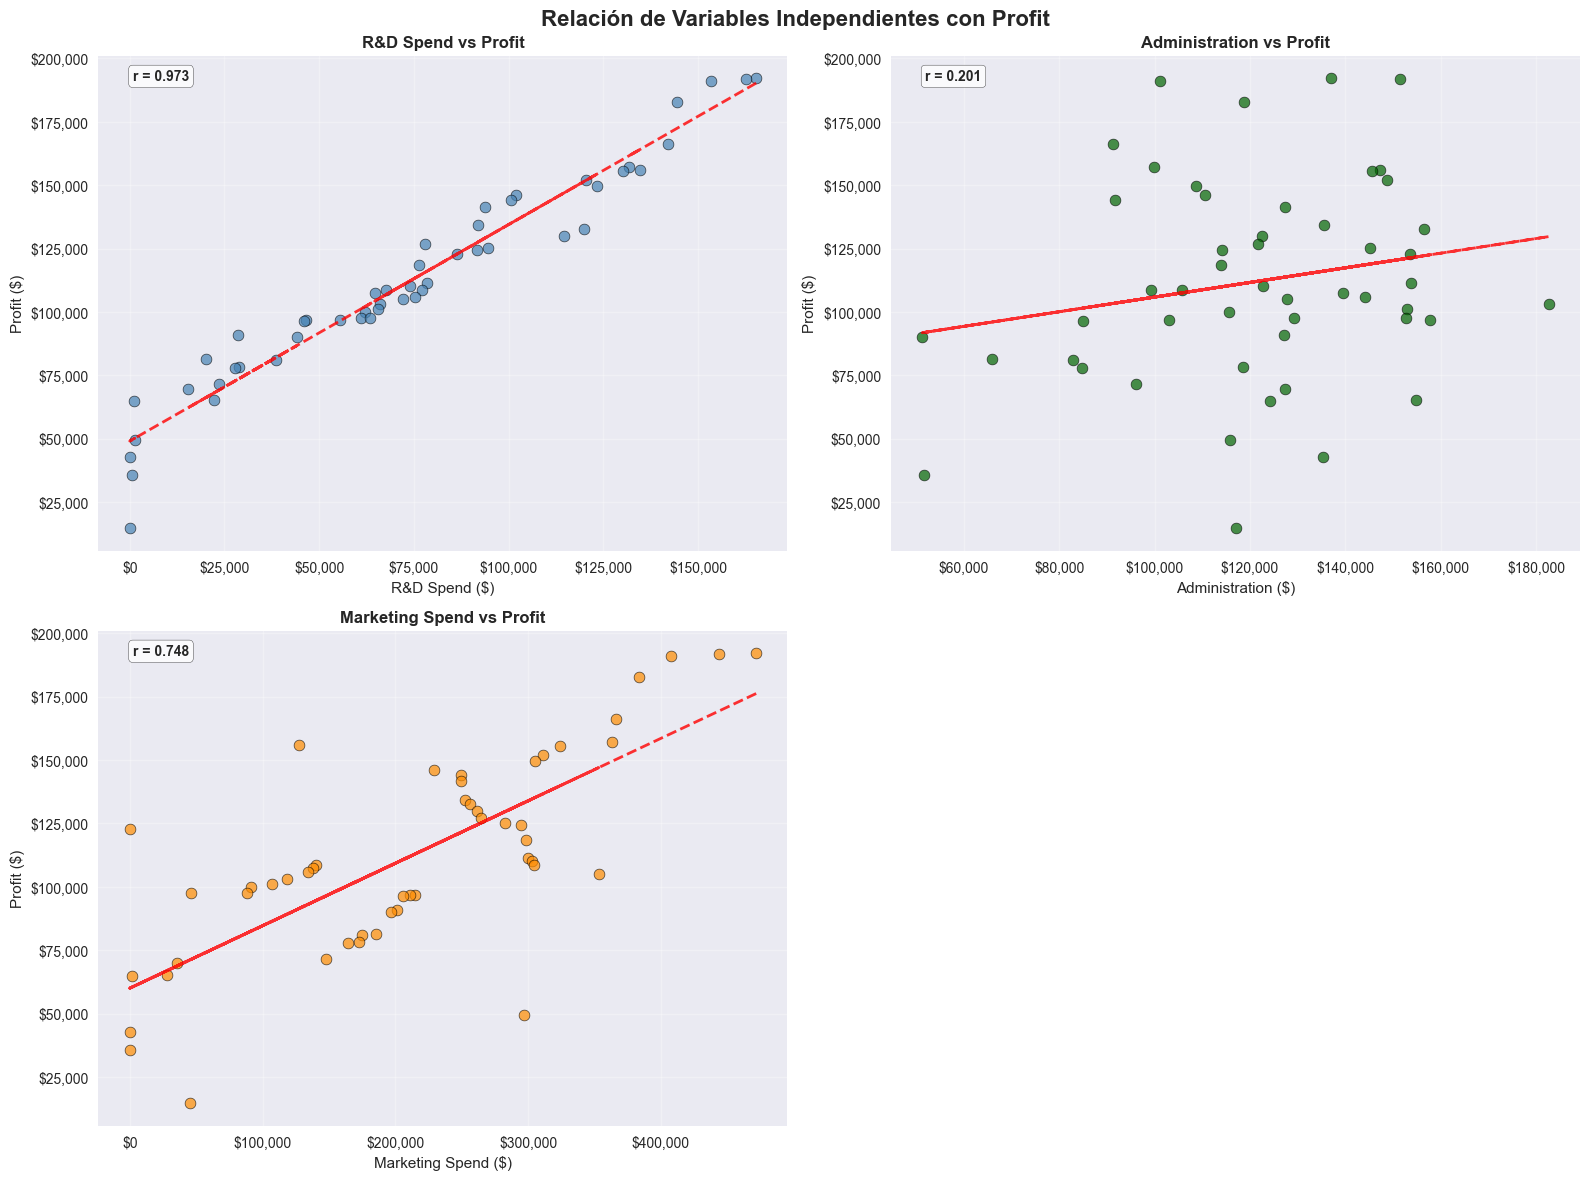

Resumen de correlaciones con Profit:
R&D Spend: 0.9729
Administration: 0.2007
Marketing Spend: 0.7478


In [7]:
# Crear gráficos de dispersión
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Relación de Variables Independientes con Profit', fontsize=16, fontweight='bold')

# Colores para cada gráfico
colors = ['steelblue', 'darkgreen', 'darkorange']
variables_independientes = ['R&D Spend', 'Administration', 'Marketing Spend']

for i, var in enumerate(variables_independientes):
    row = i // 2
    col = i % 2
    
    # Gráfico de dispersión
    axes[row, col].scatter(dataset[var], dataset['Profit'], 
                          alpha=0.7, s=60, color=colors[i], 
                          edgecolors='black', linewidth=0.5)
    
    # Línea de tendencia
    z = np.polyfit(dataset[var], dataset['Profit'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(dataset[var], p(dataset[var]), 
                       "r--", alpha=0.8, linewidth=2)
    
    axes[row, col].set_title(f'{var} vs Profit', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel(f'{var} ($)')
    axes[row, col].set_ylabel('Profit ($)')
    axes[row, col].grid(True, alpha=0.3)
    
    # Formatear ejes
    axes[row, col].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    # Mostrar correlación en el gráfico
    corr = dataset[var].corr(dataset['Profit'])
    axes[row, col].text(0.05, 0.95, f'r = {corr:.3f}', 
                       transform=axes[row, col].transAxes,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                       fontsize=10, fontweight='bold')

# Eliminar el subplot vacío
axes[1, 1].remove()

plt.tight_layout()
plt.show()

# Mostrar las correlaciones ordenadas
print("Resumen de correlaciones con Profit:")
for var in variables_independientes:
    corr = dataset[var].corr(dataset['Profit'])
    print(f"{var}: {corr:.4f}")

### 5.2 Histogramas de distribución

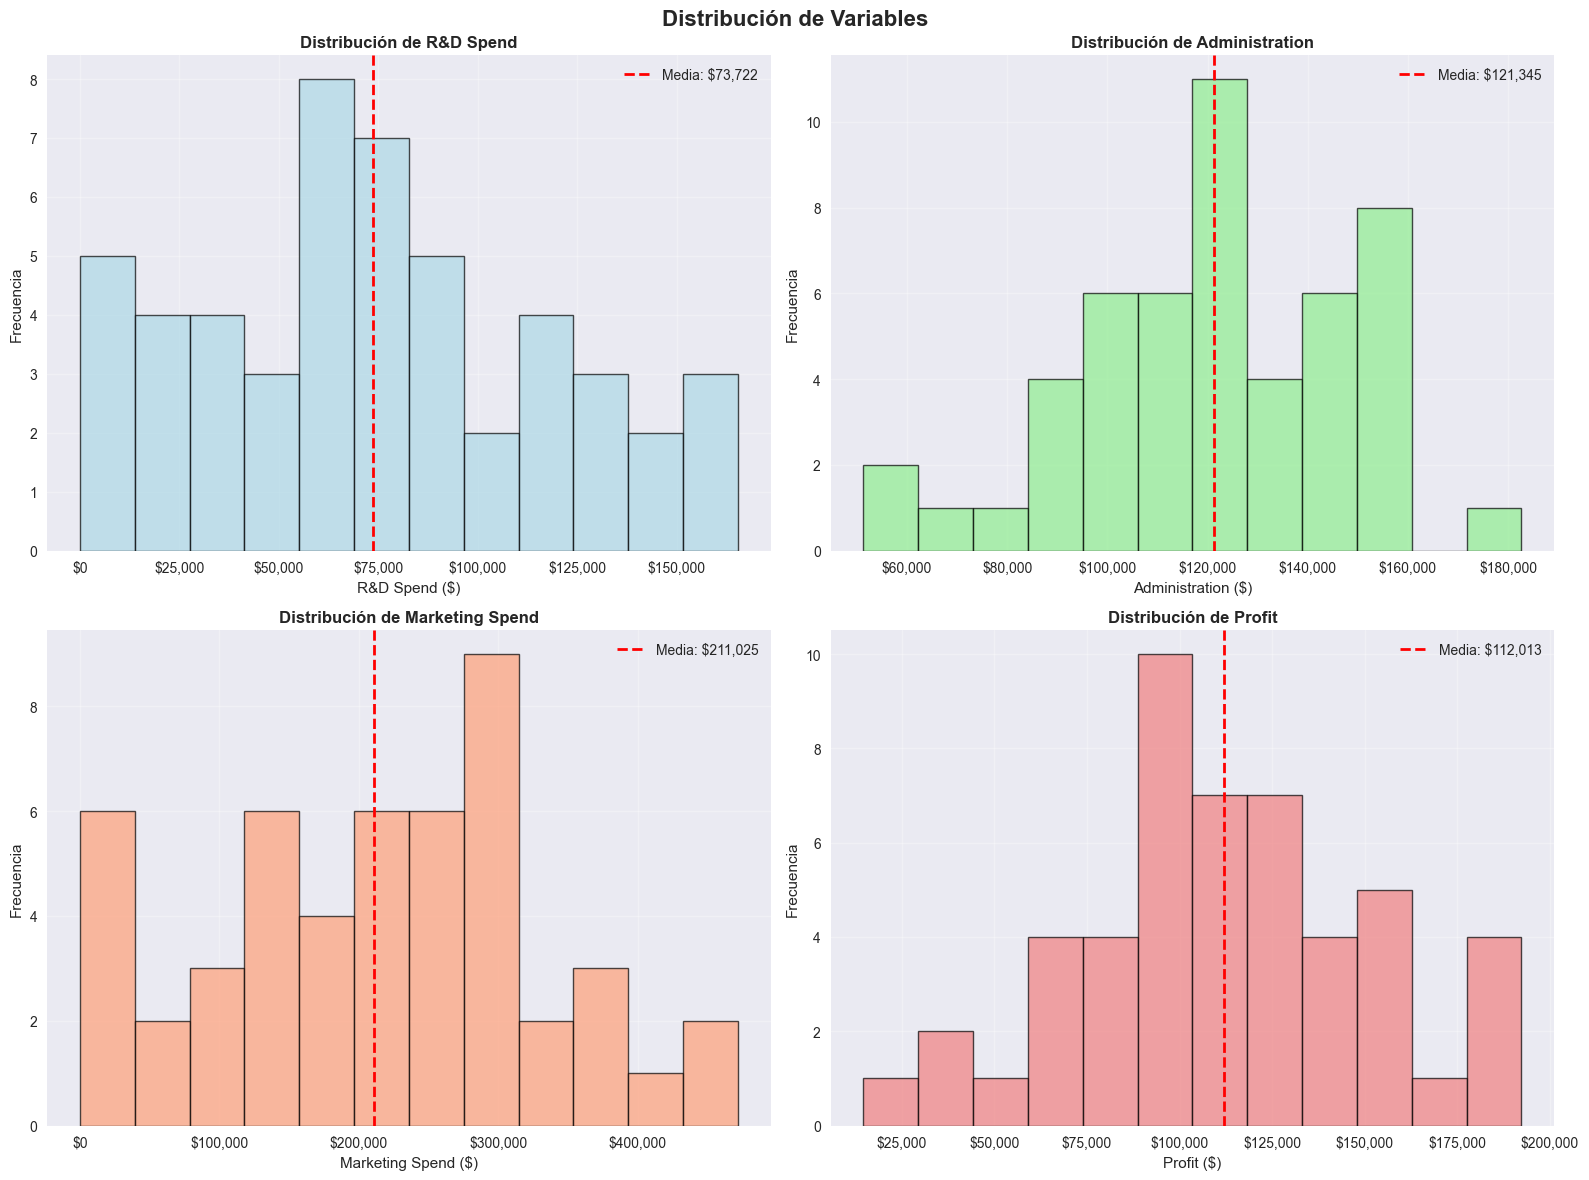

Análisis de asimetría:
R&D Spend: 0.164
  → Distribución aproximadamente simétrica

Administration: -0.489
  → Distribución aproximadamente simétrica

Marketing Spend: -0.046
  → Distribución aproximadamente simétrica

Profit: 0.023
  → Distribución aproximadamente simétrica



In [8]:
# Crear histogramas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribución de Variables', fontsize=16, fontweight='bold')

colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightcoral']

for i, var in enumerate(variables_numericas):
    row = i // 2
    col = i % 2
    
    # Histograma
    axes[row, col].hist(dataset[var], bins=12, alpha=0.7, color=colors[i], 
                       edgecolor='black', linewidth=1)
    axes[row, col].set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel(f'{var} ($)')
    axes[row, col].set_ylabel('Frecuencia')
    axes[row, col].grid(True, alpha=0.3)
    
    # Línea de media
    mean_val = dataset[var].mean()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                          label=f'Media: ${mean_val:,.0f}')
    axes[row, col].legend()
    
    # Formatear eje X
    axes[row, col].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Análisis de asimetría
print("Análisis de asimetría:")
for var in variables_numericas:
    skewness = dataset[var].skew()
    print(f"{var}: {skewness:.3f}")
    if abs(skewness) < 0.5:
        print(f"  → Distribución aproximadamente simétrica")
    elif skewness > 0:
        print(f"  → Distribución con cola larga hacia la derecha")
    else:
        print(f"  → Distribución con cola larga hacia la izquierda")
    print()

### 5.3 Análisis por Estado

/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_20075/3756973184.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[row, col].boxplot(data_by_state, labels=dataset['State'].unique(), patch_artist=True)
/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_20075/3756973184.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[row, col].boxplot(data_by_state, labels=dataset['State'].unique(), patch_artist=True)
/var/folders/c8/4vzgjk5s1rd15q7tw2p8d9040000gn/T/ipykernel_20075/3756973184.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[row, col].boxplot(data_by_state, 

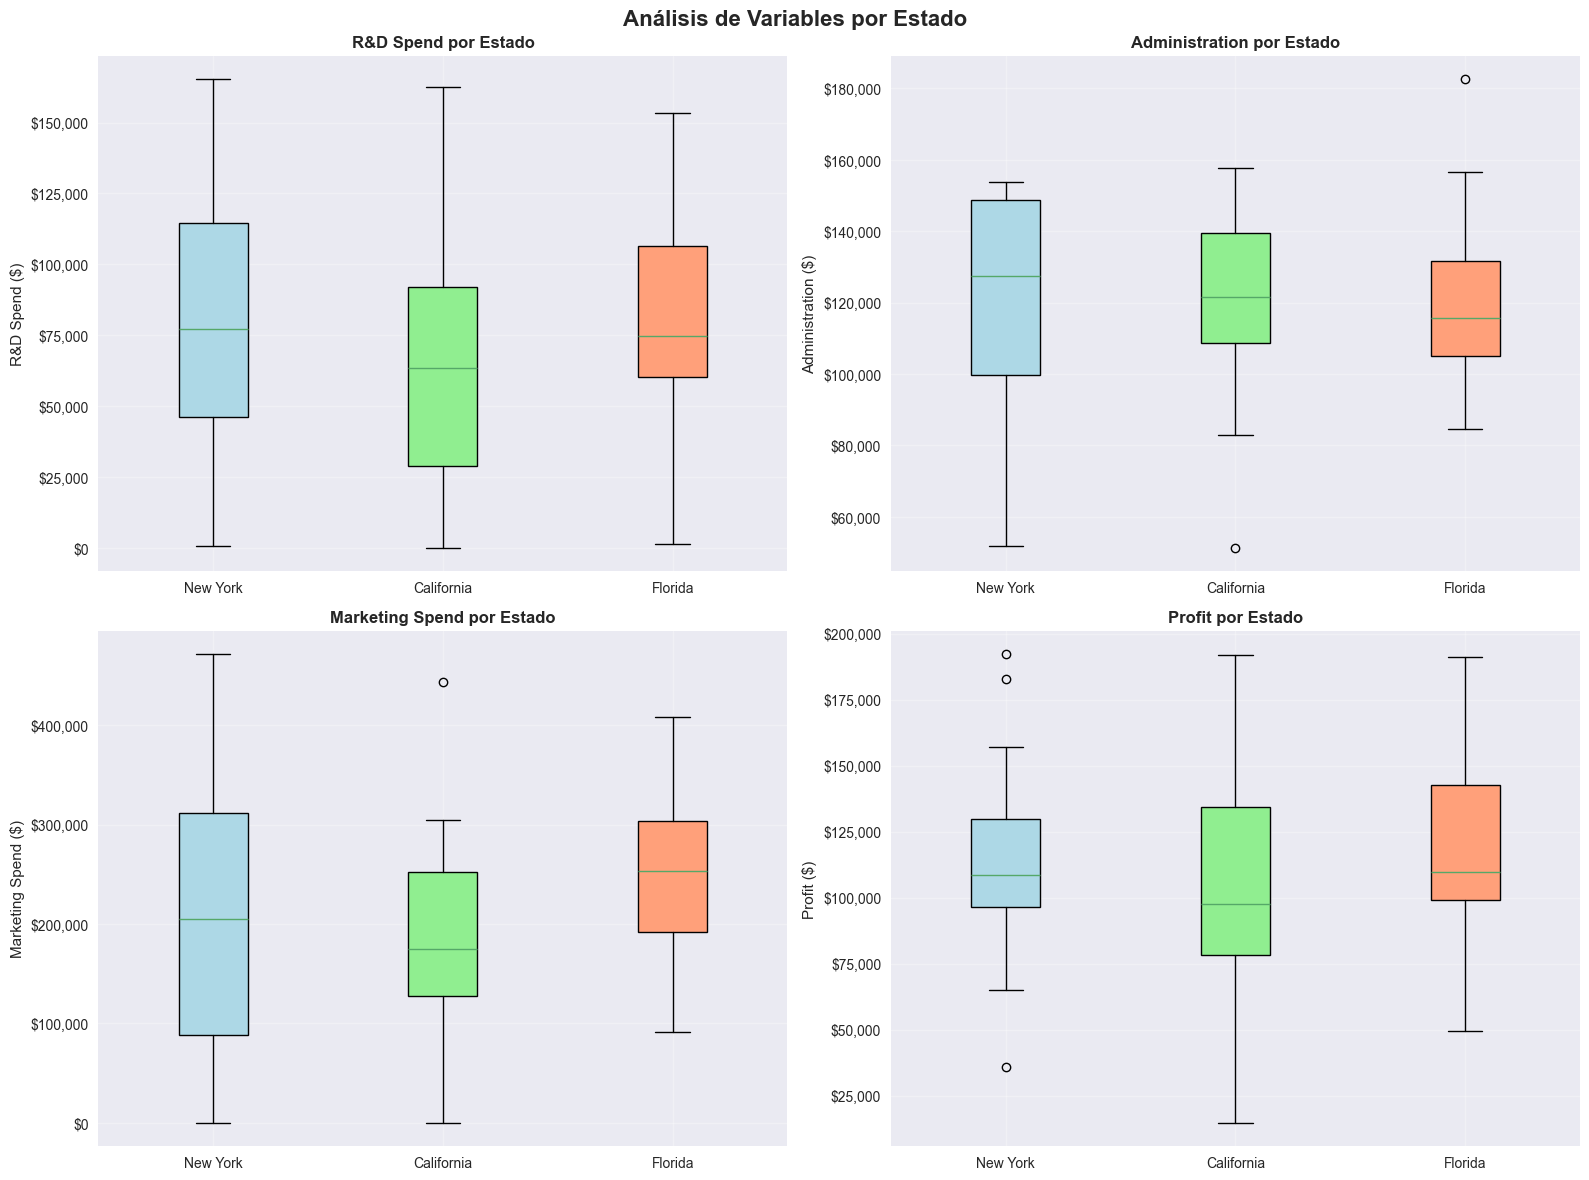

Estadísticas promedio por estado:

New York:
  Número de startups: 17
  R&D Spend promedio: $76,195.06
  Administration promedio: $121,543.47
  Marketing Spend promedio: $205,346.02
  Profit promedio: $113,756.45
  Profit mediano: $108,552.04

California:
  Número de startups: 17
  R&D Spend promedio: $64,657.67
  Administration promedio: $120,746.51
  Marketing Spend promedio: $182,540.93
  Profit promedio: $103,905.18
  Profit mediano: $97,427.84

Florida:
  Número de startups: 16
  R&D Spend promedio: $80,724.02
  Administration promedio: $121,768.90
  Marketing Spend promedio: $247,323.55
  Profit promedio: $118,774.02
  Profit mediano: $109,543.12

Análisis de diferencias entre estados:

R&D Spend:
  F-estadístico: 0.5319
  p-valor: 0.590972
  → No hay diferencias significativas entre estados

Administration:
  F-estadístico: 0.0059
  p-valor: 0.994131
  → No hay diferencias significativas entre estados

Marketing Spend:
  F-estadístico: 1.1937
  p-valor: 0.312128
  → No hay difer

In [9]:
# Análisis por estado
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Variables por Estado', fontsize=16, fontweight='bold')

# Box plots por estado para cada variable
for i, var in enumerate(variables_numericas):
    row = i // 2
    col = i % 2
    
    # Crear box plot
    data_by_state = [dataset[dataset['State'] == state][var] for state in dataset['State'].unique()]
    box = axes[row, col].boxplot(data_by_state, labels=dataset['State'].unique(), patch_artist=True)
    
    # Colorear las cajas
    colors_box = ['lightblue', 'lightgreen', 'lightsalmon']
    for patch, color in zip(box['boxes'], colors_box):
        patch.set_facecolor(color)
    
    axes[row, col].set_title(f'{var} por Estado', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(f'{var} ($)')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Estadísticas por estado
print("Estadísticas promedio por estado:")
print("="*60)
for state in dataset['State'].unique():
    data_state = dataset[dataset['State'] == state]
    print(f"\n{state}:")
    print(f"  Número de startups: {len(data_state)}")
    for var in variables_numericas:
        print(f"  {var} promedio: ${data_state[var].mean():,.2f}")
    print(f"  Profit mediano: ${data_state['Profit'].median():,.2f}")

# Análisis de varianza por estado (ANOVA simple)
print("\n" + "="*60)
print("Análisis de diferencias entre estados:")
from scipy import stats

for var in variables_numericas:
    groups = [dataset[dataset['State'] == state][var] for state in dataset['State'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"\n{var}:")
    print(f"  F-estadístico: {f_stat:.4f}")
    print(f"  p-valor: {p_value:.6f}")
    if p_value < 0.05:
        print(f"  → Existen diferencias significativas entre estados")
    else:
        print(f"  → No hay diferencias significativas entre estados")

## 6. Detección de valores atípicos

DETECCIÓN DE VALORES ATÍPICOS

--- Análisis de valores atípicos para R&D Spend ---
Q1: $39,936.37
Q3: $101,602.80
IQR: $61,666.43
Límite inferior: $-52,563.28
Límite superior: $194,102.45
Número de valores atípicos: 0
No se encontraron valores atípicos.

--- Análisis de valores atípicos para Administration ---
Q1: $103,730.88
Q3: $144,842.18
IQR: $41,111.30
Límite inferior: $42,063.92
Límite superior: $206,509.14
Número de valores atípicos: 0
No se encontraron valores atípicos.

--- Análisis de valores atípicos para Marketing Spend ---
Q1: $129,300.13
Q3: $299,469.08
IQR: $170,168.95
Límite inferior: $-125,953.30
Límite superior: $554,722.51
Número de valores atípicos: 0
No se encontraron valores atípicos.

--- Análisis de valores atípicos para Profit ---
Q1: $90,138.90
Q3: $139,765.98
IQR: $49,627.07
Límite inferior: $15,698.29
Límite superior: $214,206.59
Número de valores atípicos: 1
Valores atípicos encontrados:
  Fila 49: $14,681.40


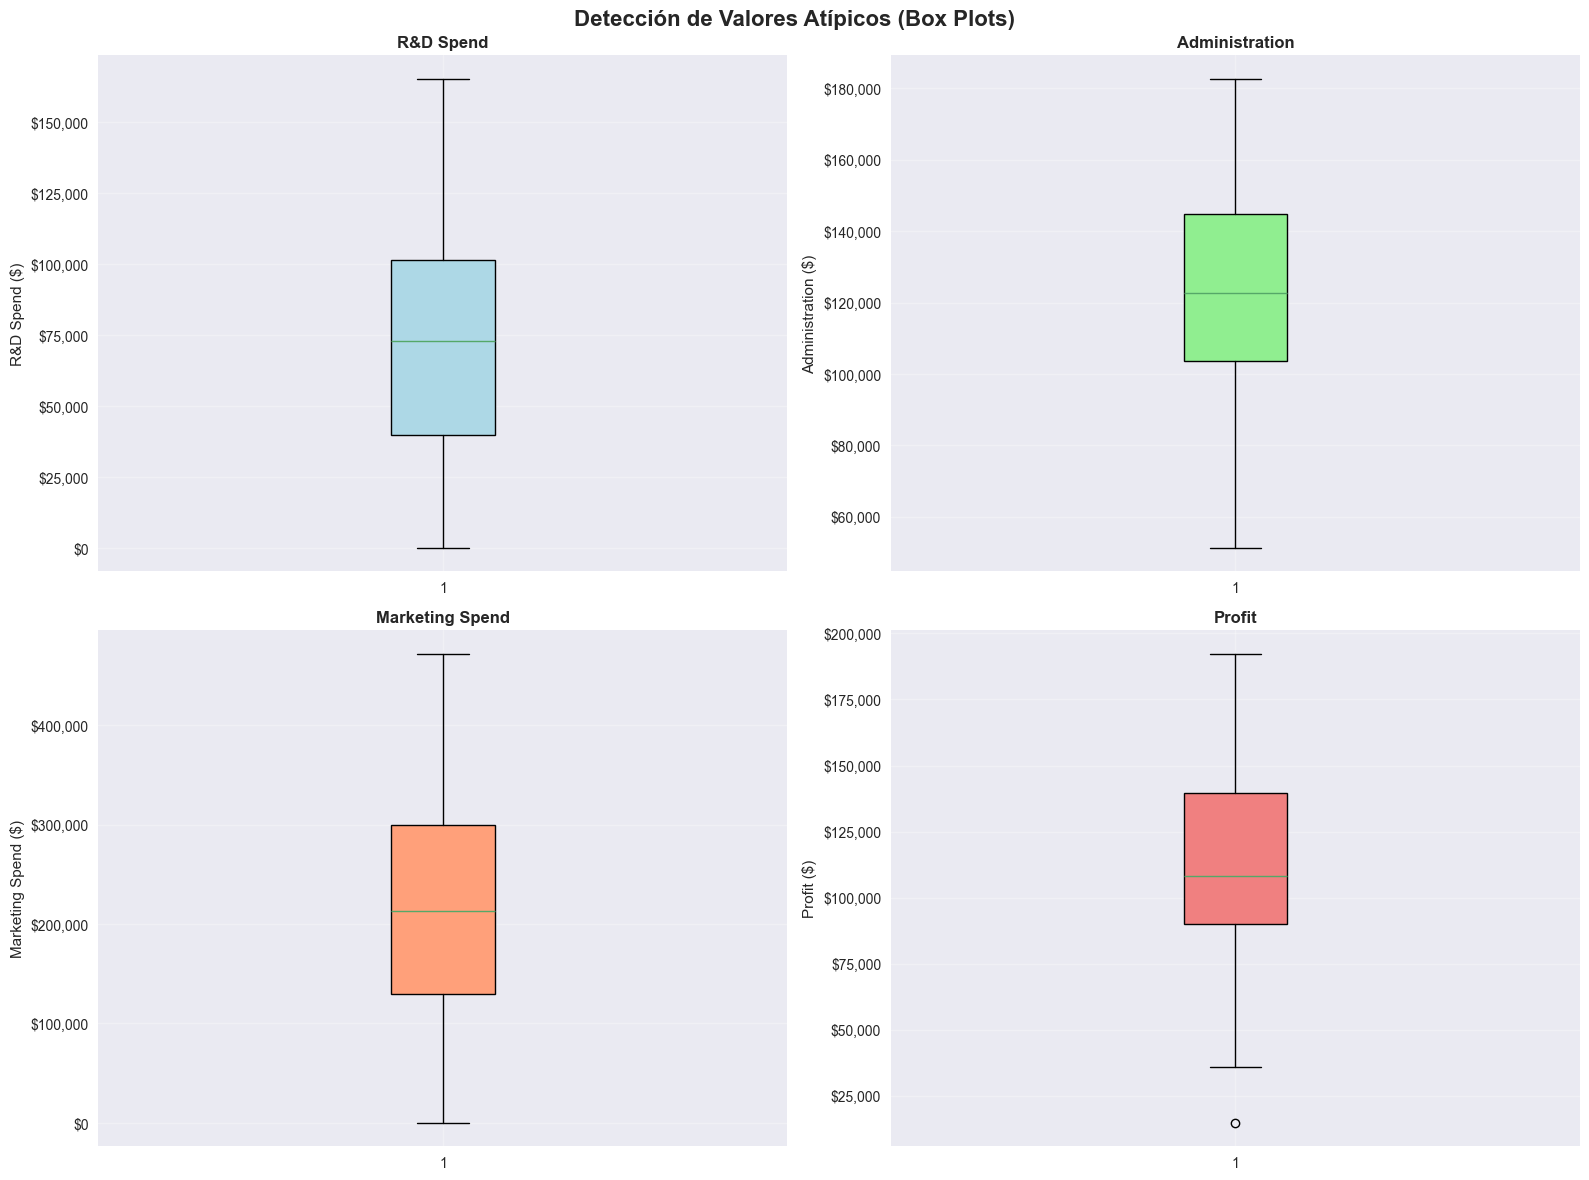


RESUMEN DE VALORES ATÍPICOS:
R&D Spend: 0 valores atípicos
Administration: 0 valores atípicos
Marketing Spend: 0 valores atípicos
Profit: 1 valores atípicos

Total de observaciones con valores atípicos: 1
Porcentaje del dataset: 2.0%

Filas que contienen valores atípicos: [49]


In [10]:
# Función para identificar outliers usando el método IQR
def identificar_outliers(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    
    print(f"\n--- Análisis de valores atípicos para {columna} ---")
    print(f"Q1: ${Q1:,.2f}")
    print(f"Q3: ${Q3:,.2f}")
    print(f"IQR: ${IQR:,.2f}")
    print(f"Límite inferior: ${limite_inferior:,.2f}")
    print(f"Límite superior: ${limite_superior:,.2f}")
    print(f"Número de valores atípicos: {len(outliers)}")
    
    if len(outliers) > 0:
        print("Valores atípicos encontrados:")
        for idx in outliers.index:
            print(f"  Fila {idx}: ${outliers.loc[idx, columna]:,.2f}")
    else:
        print("No se encontraron valores atípicos.")
    
    return outliers

# Analizar outliers para cada variable numérica
print("DETECCIÓN DE VALORES ATÍPICOS")
print("="*60)

outliers_por_variable = {}
for var in variables_numericas:
    outliers_por_variable[var] = identificar_outliers(dataset, var)

# Crear visualización de outliers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Detección de Valores Atípicos (Box Plots)', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_numericas):
    row = i // 2
    col = i % 2
    
    # Box plot
    box = axes[row, col].boxplot(dataset[var], patch_artist=True)
    box['boxes'][0].set_facecolor(colors[i])
    
    axes[row, col].set_title(f'{var}', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(f'{var} ($)')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Resumen de outliers
print("\n" + "="*60)
print("RESUMEN DE VALORES ATÍPICOS:")
total_outliers = 0
for var, outliers in outliers_por_variable.items():
    print(f"{var}: {len(outliers)} valores atípicos")
    total_outliers += len(outliers)

print(f"\nTotal de observaciones con valores atípicos: {total_outliers}")
print(f"Porcentaje del dataset: {total_outliers/len(dataset)*100:.1f}%")

# Identificar filas con múltiples outliers
filas_con_outliers = set()
for outliers in outliers_por_variable.values():
    filas_con_outliers.update(outliers.index)

if len(filas_con_outliers) > 0:
    print(f"\nFilas que contienen valores atípicos: {sorted(filas_con_outliers)}")
else:
    print("\nNo hay filas con valores atípicos.")

## 7. Conclusiones del análisis exploratorio

### Resumen de hallazgos principales:

**📊 Características del dataset:**
- **Tamaño**: 50 startups con 5 variables (4 numéricas, 1 categórica)
- **Variables**: R&D Spend, Administration, Marketing Spend, State, Profit
- **Calidad de datos**: Sin valores faltantes ni duplicados
- **Distribución geográfica**: Equilibrada entre 3 estados (NY: 17, CA: 17, FL: 16)

**🔍 Estadísticas descriptivas:**
- **R&D Spend**: Promedio $73,722 (rango: $0 - $165,349)
- **Administration**: Promedio $121,345 (rango: $51,283 - $182,646)
- **Marketing Spend**: Promedio $211,025 (rango: $0 - $471,784)
- **Profit**: Promedio $112,013 (rango: $14,681 - $192,262)

**📈 Correlaciones con Profit (variable objetivo):**
- **R&D Spend**: 0.9729 → **Correlación muy fuerte positiva** ⭐
- **Marketing Spend**: 0.7478 → **Correlación muy fuerte positiva** ⭐
- **Administration**: 0.2007 → **Correlación débil positiva**

**📊 Distribución de datos:**
- **Todas las variables numéricas** presentan distribuciones **aproximadamente simétricas**
- **Asimetría baja** en todas las variables (valores entre -0.49 y 0.16)
- **Buena normalidad** para aplicar modelos de regresión

**🌎 Análisis por Estado:**
- **No hay diferencias significativas** entre estados en ninguna variable
- **Florida** tiende a tener profits ligeramente más altos
- **Distribución homogénea** de startups por estado

**🔍 Valores atípicos:**
- **Solo 1 valor atípico detectado** (2% del dataset)  
- **Fila 49**: Profit de $14,681 (muy bajo comparado con el resto)
- **Resto de variables**: Sin valores atípicos

**⚠️ Datos especiales:**
- **2 startups** con R&D Spend = $0 (4% del dataset)
- **3 startups** con Marketing Spend = $0 (6% del dataset)
- Estos valores cero son **legítimos** (algunas startups no invierten en esas áreas)

**✅ Idoneidad para modelos de regresión:**
- **Excelente candidato** para regresión lineal múltiple
- **R&D Spend** es el predictor más fuerte del profit
- **Marketing Spend** también es un buen predictor
- **Administration** tiene menor poder predictivo
- **Estado** podría incluirse como variable categórica, pero no parece crítica
- **Datos limpios** y bien distribuidos

In [11]:
# Resumen final ejecutivo
print("=" * 80)
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DATASET STARTUPS")
print("=" * 80)

print(f"""
🏢 INFORMACIÓN GENERAL:
   • Total de startups analizadas: {len(dataset)}
   • Variables disponibles: {len(dataset.columns)}
   • Estados representados: {dataset['State'].nunique()} ({', '.join(dataset['State'].unique())})
   • Calidad de datos: ✅ Excelente (sin valores faltantes ni duplicados)

💰 RANGOS DE INVERSIÓN Y PROFIT:
   • R&D Spend: ${dataset['R&D Spend'].min():,.0f} - ${dataset['R&D Spend'].max():,.0f}
   • Marketing Spend: ${dataset['Marketing Spend'].min():,.0f} - ${dataset['Marketing Spend'].max():,.0f}
   • Administration: ${dataset['Administration'].min():,.0f} - ${dataset['Administration'].max():,.0f}
   • Profit: ${dataset['Profit'].min():,.0f} - ${dataset['Profit'].max():,.0f}

🎯 PREDICTORES CLAVE PARA PROFIT:
   1. R&D Spend (r = {dataset['R&D Spend'].corr(dataset['Profit']):.3f}) - PREDICTOR PRINCIPAL ⭐
   2. Marketing Spend (r = {dataset['Marketing Spend'].corr(dataset['Profit']):.3f}) - PREDICTOR FUERTE ⭐
   3. Administration (r = {dataset['Administration'].corr(dataset['Profit']):.3f}) - PREDICTOR DÉBIL

📊 MODELO RECOMENDADO:
   • Regresión Lineal Múltiple
   • Variables principales: R&D Spend + Marketing Spend
   • Variable opcional: Administration
   • Estado: No significativo estadísticamente

⚠️  CONSIDERACIONES:
   • 1 valor atípico en Profit (fila {dataset[dataset['Profit'] == dataset['Profit'].min()].index[0]}: ${dataset['Profit'].min():,.0f})
   • {(dataset['R&D Spend'] == 0).sum()} startups sin inversión en R&D
   • {(dataset['Marketing Spend'] == 0).sum()} startups sin inversión en Marketing

✅ CONCLUSIÓN: Dataset ideal para regresión múltiple con excelente calidad de datos
""")
print("=" * 80)

RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DATASET STARTUPS

🏢 INFORMACIÓN GENERAL:
   • Total de startups analizadas: 50
   • Variables disponibles: 5
   • Estados representados: 3 (New York, California, Florida)
   • Calidad de datos: ✅ Excelente (sin valores faltantes ni duplicados)

💰 RANGOS DE INVERSIÓN Y PROFIT:
   • R&D Spend: $0 - $165,349
   • Marketing Spend: $0 - $471,784
   • Administration: $51,283 - $182,646
   • Profit: $14,681 - $192,262

🎯 PREDICTORES CLAVE PARA PROFIT:
   1. R&D Spend (r = 0.973) - PREDICTOR PRINCIPAL ⭐
   2. Marketing Spend (r = 0.748) - PREDICTOR FUERTE ⭐
   3. Administration (r = 0.201) - PREDICTOR DÉBIL

📊 MODELO RECOMENDADO:
   • Regresión Lineal Múltiple
   • Variables principales: R&D Spend + Marketing Spend
   • Variable opcional: Administration
   • Estado: No significativo estadísticamente

⚠️  CONSIDERACIONES:
   • 1 valor atípico en Profit (fila 49: $14,681)
   • 2 startups sin inversión en R&D
   • 3 startups sin inversión en Marketing

✅ 